<a href="https://www.kaggle.com/gazu468/tps-dec-eda-modeling?scriptVersionId=89473592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#           Dont forget to Uovote if this notebook is helpful.


**Objective:** Idea behind this notebook is Simple EDA with two Models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from  datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as datetime
from sklearn.metrics import accuracy_score
from category_encoders.target_encoder import TargetEncoder
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../input/tabular-playground-series-dec-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-dec-2021/test.csv")

### Explore data

In [3]:
train.head(100)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,3299,75,6,279,151,4300,226,233,163,...,0,0,0,0,0,0,0,0,0,1
96,96,3232,32,8,197,4,4008,226,231,105,...,0,0,0,0,0,0,0,0,0,1
97,97,2958,159,15,265,10,4699,224,235,99,...,0,0,0,0,0,0,0,0,0,2
98,98,2975,327,2,293,25,7039,226,232,156,...,0,0,0,0,0,0,0,0,0,2


In [4]:
train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3999995,3999995,2954,34,25,51,65,6314,240,237,103,...,0,0,0,0,0,0,0,0,0,2
3999996,3999996,2926,104,8,696,83,5427,210,216,150,...,0,0,0,0,0,0,0,0,0,2
3999997,3999997,2911,144,1,509,58,4820,195,192,91,...,0,0,0,0,0,0,0,1,0,2
3999998,3999998,2580,178,17,376,86,2592,225,183,39,...,0,0,0,0,0,0,0,0,0,3
3999999,3999999,3083,136,4,44,9,1675,213,197,205,...,0,0,0,0,0,0,0,0,0,1


In [5]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
#10 columns check
train.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


### Through all the columns of a dataframe and modify the data type to reduce memory usage

In [7]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1708.98 MB
Memory usage after optimization is: 259.40 MB
Decreased by 84.8%
Memory usage of dataframe is 419.62 MB
Memory usage after optimization is: 63.90 MB
Decreased by 84.8%


In [9]:
# drop ID
train = train.drop('Id', axis=1)
test=test.drop('Id', axis=1)

In [10]:
train.describe().T.drop('count', axis=1).head(10).style.highlight_max(color='darkred')

,mean,std,min,25%,50%,75%,max
Elevation,2980.191660,289.048167,1773.000000,2760.000000,2966.000000,3217.000000,4383.000000
Aspect,151.585671,109.961122,-33.000000,60.000000,123.000000,247.000000,407.000000
Slope,15.097537,8.546731,-3.000000,9.000000,14.000000,20.000000,64.000000
Horizontal_Distance_To_Hydrology,271.315436,226.549680,-92.000000,110.000000,213.000000,361.000000,1602.000000
Vertical_Distance_To_Hydrology,51.662621,68.215966,-317.000000,4.000000,31.000000,78.000000,647.000000
Horizontal_Distance_To_Roadways,1766.641630,1315.609890,-287.000000,822.000000,1436.000000,2365.000000,7666.000000
Hillshade_9am,211.837542,30.759956,-4.000000,198.000000,218.000000,233.000000,301.000000
Hillshade_Noon,221.061441,22.231335,49.000000,210.000000,224.000000,237.000000,279.000000
Hillshade_3pm,140.810874,43.698639,-53.000000,115.000000,142.000000,169.000000,272.000000
Horizontal_Distance_To_Fire_Points,1581.406810,1127.616169,-277.000000,781.000000,1361.000000,2084.000000,8075.000000


In [11]:
# Choose only numerical columns
train.select_dtypes(include=np.number).head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,0,0,0,0,1
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,0,0,0,0,2
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,0,0,0,0,1
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,0,0,0,0,2
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,0,0,0,0,2


In [12]:
# print("Mean",np.mean(train))
# print("Standard Deviation", np.std(train))
# print("Min", np.min(train))
# print("Max", np.max(train))

In [13]:
train['Cover_Type'].describe()

count    4.000000e+06
mean     1.771335e+00
std      8.938060e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      7.000000e+00
Name: Cover_Type, dtype: float64

In [14]:
train.groupby('Cover_Type').size()

Cover_Type
1    1468136
2    2262087
3     195712
4        377
5          1
6      11426
7      62261
dtype: int64

(array([1.468136e+06, 2.262087e+06, 0.000000e+00, 1.957120e+05,
        0.000000e+00, 3.770000e+02, 1.000000e+00, 0.000000e+00,
        1.142600e+04, 6.226100e+04]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

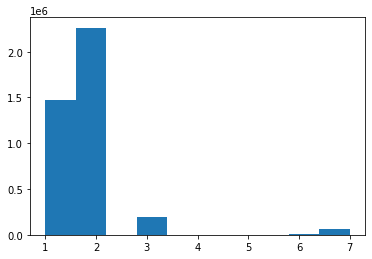

In [15]:
plt.hist(train['Cover_Type'])

In [16]:
#skewness and kurtosis
print("Skewness: %f" % train['Cover_Type'].skew())
print("Kurtosis: %f" % train['Cover_Type'].kurt())

Skewness: 3.320651
Kurtosis: 17.043826


### Relationship with numerical variables

<AxesSubplot:xlabel='Hillshade_Noon', ylabel='Cover_Type'>

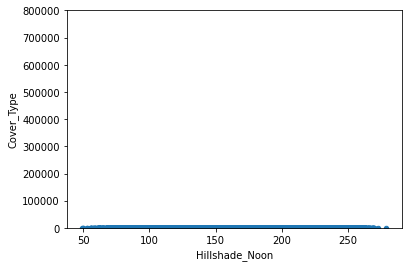

In [17]:
var = 'Hillshade_Noon'
data = pd.concat([train['Cover_Type'], train[var]], axis=1)
data.plot.scatter(x=var, y='Cover_Type', ylim=(0,800000))

In [18]:
#most correlated 10 columns
corr=train.corr()
v=10
colmn = corr.nlargest(v, 'Cover_Type')
colmn

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Cover_Type,-0.395961,-0.002828,0.023137,0.012712,0.033007,-0.093850,-0.002229,-0.006536,-0.004694,-0.069258,...,-0.005048,0.006865,6.801802e-03,0.027809,0.017784,0.024645,0.050177,0.099161,0.053765,1.000000
Wilderness_Area4,-0.362227,-0.007213,0.053939,-0.024573,0.028507,-0.114399,-0.008593,-0.014324,-0.016940,-0.107889,...,-0.024715,-0.020129,2.548482e-03,-0.000791,-0.000332,-0.000412,-0.023677,-0.018725,-0.012650,0.250643
Soil_Type39,0.021049,0.000966,-0.001187,0.003751,0.000802,0.012305,-0.001587,-0.005240,0.001683,-0.000359,...,-0.004366,-0.007284,4.722723e-03,-0.003501,0.000420,-0.002920,0.003724,1.000000,0.000259,0.099161
Wilderness_Area3,-0.002132,0.003224,0.033127,0.011266,0.001772,-0.012946,-0.011854,-0.016497,0.011156,-0.085912,...,0.018262,0.025524,6.735259e-04,0.001565,-0.002175,0.004555,0.002757,0.006210,-0.006894,0.093651
Soil_Type10,-0.106830,-0.003641,0.021526,-0.000951,0.008839,-0.027525,-0.013579,-0.012342,0.007057,-0.051796,...,-0.019624,-0.011237,3.672368e-03,-0.002884,0.004095,0.006705,-0.008299,-0.001829,-0.003756,0.073476
Soil_Type40,0.020929,0.002169,0.001291,0.002938,0.006634,0.010537,0.000999,0.003422,0.001903,0.008353,...,-0.004221,-0.002489,-7.300885e-07,-0.005563,-0.001345,-0.003954,-0.003815,0.000259,1.000000,0.053765
Soil_Type38,0.026208,0.000088,-0.002364,0.004778,0.000109,0.016551,-0.003145,0.000263,0.004234,0.007454,...,-0.007801,-0.007815,2.052888e-03,0.001139,0.003817,-0.001738,1.000000,0.003724,-0.003815,0.050177
Soil_Type3,-0.084358,0.004698,0.017894,-0.007511,0.003161,-0.037947,0.002418,0.010081,0.002936,-0.039812,...,0.005596,0.005929,1.359109e-04,-0.001145,0.000029,0.000043,-0.011491,-0.007776,-0.007374,0.048529
Soil_Type6,-0.075414,-0.001432,-0.008455,-0.000155,0.003654,-0.015250,0.002188,0.004927,0.004313,-0.014435,...,0.009834,0.010564,1.871274e-03,-0.000737,-0.000372,-0.002235,-0.007075,-0.004045,-0.003974,0.048520
Soil_Type2,-0.042345,-0.000246,0.000822,0.002722,0.002258,-0.018044,0.000789,0.002612,0.007603,-0.021097,...,-0.009234,-0.007900,1.839578e-03,0.000736,0.001040,-0.000956,-0.004722,-0.001044,-0.002581,0.036349


### Correlation

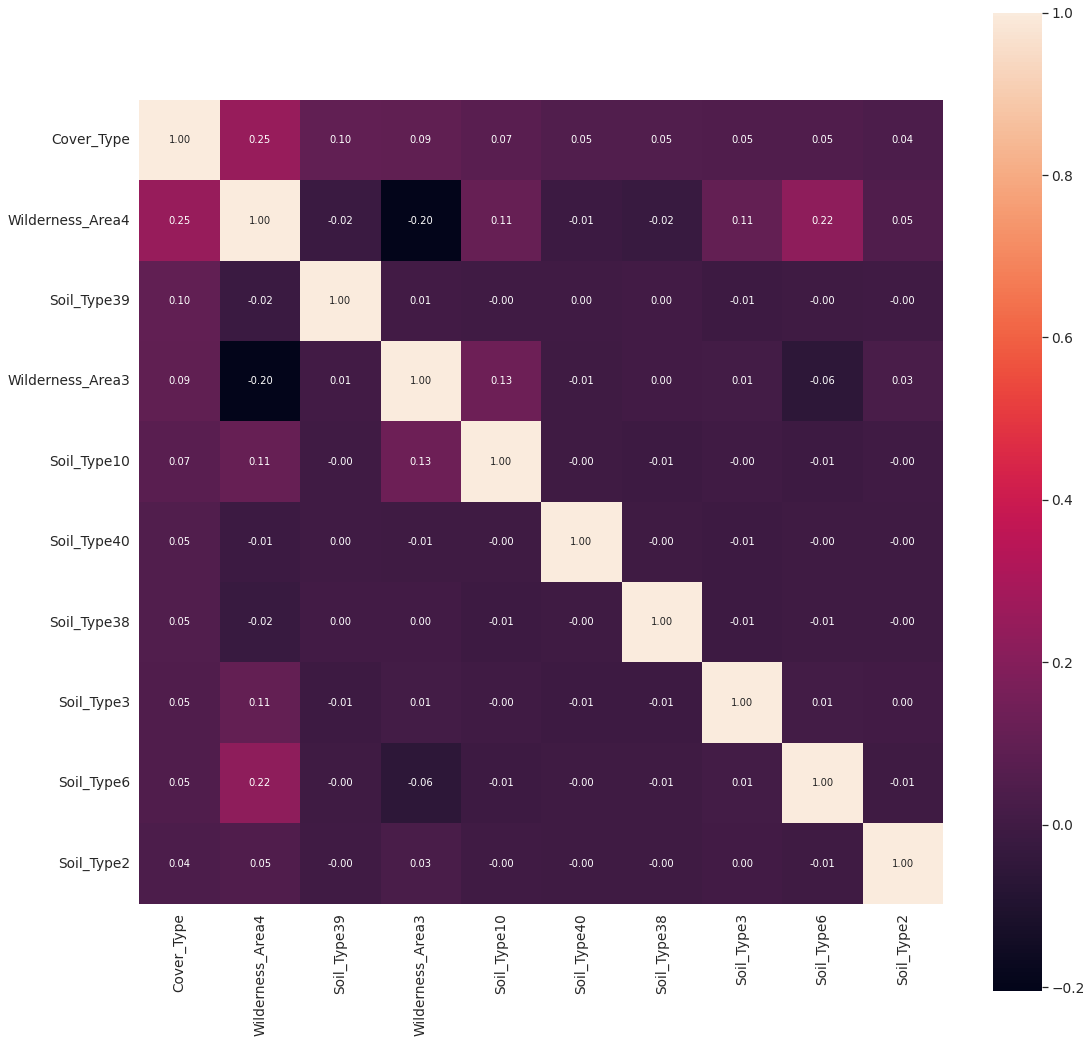

In [19]:
colmn = corr.nlargest(v, 'Cover_Type')['Cover_Type'].index 
xm = np.corrcoef(train[colmn].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(18, 18))
hm = sns.heatmap(xm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=colmn.values, xticklabels=colmn.values)
plt.show()


### Missing Value
There is no missing values.

In [20]:
total= train.isnull().sum().sort_values(ascending=False)
total.head()

Elevation      0
Soil_Type28    0
Soil_Type17    0
Soil_Type18    0
Soil_Type19    0
dtype: int64

In [21]:
#drop output
train_X = train.drop('Cover_Type', axis=1)
#contain output on y container
train_y = train['Cover_Type']

In [22]:
train_y.head()

0    1
1    2
2    1
3    2
4    2
Name: Cover_Type, dtype: int8

### Split the dataset

In [23]:
#trin_test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.22, random_state=2021 )

In [24]:
del train, train_X, train_y

In [25]:
y_test

3072928    2
560206     1
2026981    2
3331817    2
271198     2
          ..
273671     2
2081159    1
3389177    2
579238     2
2723656    2
Name: Cover_Type, Length: 880000, dtype: int8

### Divided categorical and Numerical

In [26]:
#Encoding those data
nums_cols = [col for col in X_train.columns if X_train[col].dtype in ["float16","float32","float64"]]
catgo_cols = [col for col in X_train.columns if X_train[col].dtype not in ["float16","float32","float64"]]

In [27]:
# catgo_cols

### Encoder featurs
<!-- Divided categorical and Numerical -->

In [28]:
d_test = test

for cols in catgo_cols:
    enc = TargetEncoder(cols=[cols])
    x = enc.fit_transform(X_train, y_train)
    y= enc.transform(X_test)
    z = enc.transform(d_test)


In [29]:
del test

### Normalization
<!-- ### Encoder featurs
Divided categorical and Numerical -->

In [30]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(X_train)
train_X = pd.DataFrame(scaler.transform(x))
test_X = pd.DataFrame(scaler.transform(y))
test = pd.DataFrame(scaler.transform(z))

In [31]:
del x,y,z

In [32]:
train_X

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.041575,-0.149733,0.454545,0.856574,1.054054,-0.514267,-0.028571,0.037037,-1.777778,-0.637759,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.762368
1,-0.417943,-0.326203,-0.090909,0.573705,0.175676,-0.360571,0.742857,-0.037037,-0.907407,0.475825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368
2,0.142232,0.144385,0.727273,0.035857,0.554054,2.514267,0.171429,0.555556,0.277778,0.194935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368
3,0.964989,0.267380,-0.727273,0.155378,0.810811,-0.608301,0.314286,0.777778,0.592593,0.912510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368
4,0.529540,0.090909,1.454545,-0.362550,1.324324,1.278859,-2.285714,-0.296296,-1.055556,0.348427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119995,-0.417943,0.240642,0.636364,0.729084,-0.175676,-0.750973,0.657143,1.074074,-0.740741,-0.795088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.032346
3119996,0.087527,1.117647,-0.545455,0.147410,-0.337838,0.021401,-1.971429,-0.333333,1.407407,-0.087490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368
3119997,-0.838074,-0.577540,0.818182,1.111554,-0.310811,-0.267185,0.285714,-0.074074,0.981481,-0.132003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368
3119998,-0.048140,-0.267380,-0.090909,-0.294821,1.135135,-0.484436,0.685714,-1.148148,0.148148,-0.136608,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.762368


### Convert Into Numpy array
<!-- ### Normalization
### Encoder featurs
Divided categorical and Numerical -->

In [33]:
train_X = train_X.to_numpy()
y_train =y_train.to_numpy()
y_test =y_test.to_numpy()
test_X =test_X.to_numpy()
test =test.to_numpy()

In [34]:
#after convert to numpy
train_X  

array([[ 0.04157549, -0.14973262,  0.45454545, ...,  0.        ,
         0.        ,  1.76236812],
       [-0.41794311, -0.32620321, -0.09090909, ...,  0.        ,
         0.        ,  1.76236812],
       [ 0.14223195,  0.14438503,  0.72727273, ...,  0.        ,
         0.        ,  1.76236812],
       ...,
       [-0.8380744 , -0.57754011,  0.81818182, ...,  0.        ,
         0.        ,  1.76236812],
       [-0.04814004, -0.26737968, -0.09090909, ...,  0.        ,
         0.        ,  1.76236812],
       [-0.48358862, -0.14438503,  1.81818182, ...,  0.        ,
         0.        ,  1.76236812]])

In [35]:
# XGBClassifier = xgb.XGBClassifier(max_depth = 9,
#                                  learning_rate = 0.008,
#                                  n_estimators = 20000,
# #                                  objective = 'binary:logistic',
#                                  objective = 'multi:softmax',
#                                  tree_method = 'gpu_hist',
#                                  booster = 'gbtree',
#                                  gamma = 0.75,
#                                  max_delta_step = 6,
#                                  min_child_weight = 9,
#                                  subsample = 0.8326,
#                                  colsample_bytree = 0.7,
#                                  colsample_bynode= 0.7523,
#                                  colsample_bylevel=0.8231,
#                                  predictor= 'gpu_predictor'
# #                                  n_jobs = -1
#                                  )

# Modeling 
Lets check several model first then we take the best accurate model for submission.

### XGBClassifier

In [36]:
from xgboost import XGBClassifier


# declare parameters
params = {
#             'objective':'binary:logistic',/
            'objective' : 'multi:softmax',
            'tree_method': 'gpu_hist',
            'eval_metric': 'mlogloss',
            'booster' : 'gbtree',
            'subsample' : 0.8326,
            'gamma' : 0.48,
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': .027,
            'n_estimators':3000,
            'predictor': 'gpu_predictor'
        }       
           
          
# instantiate the classifier 
xgb = XGBClassifier(**params)
xgb.fit(train_X, y_train,
          early_stopping_rounds=200,
          eval_set=[(test_X,y_test)],
          verbose=True)


[0]	validation_0-mlogloss:1.86501
[1]	validation_0-mlogloss:1.79112
[2]	validation_0-mlogloss:1.72317
[3]	validation_0-mlogloss:1.66023
[4]	validation_0-mlogloss:1.60161
[5]	validation_0-mlogloss:1.54686
[6]	validation_0-mlogloss:1.49556
[7]	validation_0-mlogloss:1.44727
[8]	validation_0-mlogloss:1.40167
[9]	validation_0-mlogloss:1.35852
[10]	validation_0-mlogloss:1.31764
[11]	validation_0-mlogloss:1.27876
[12]	validation_0-mlogloss:1.24180
[13]	validation_0-mlogloss:1.20655
[14]	validation_0-mlogloss:1.17288
[15]	validation_0-mlogloss:1.14074
[16]	validation_0-mlogloss:1.10998
[17]	validation_0-mlogloss:1.08052
[18]	validation_0-mlogloss:1.05220
[19]	validation_0-mlogloss:1.02509
[20]	validation_0-mlogloss:0.99901
[21]	validation_0-mlogloss:0.97389
[22]	validation_0-mlogloss:0.94976
[23]	validation_0-mlogloss:0.92642
[24]	validation_0-mlogloss:0.90399
[25]	validation_0-mlogloss:0.88239
[26]	validation_0-mlogloss:0.86157
[27]	validation_0-mlogloss:0.84146
[28]	validation_0-mlogloss:0.8

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0.48, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.027, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', predictor='gpu_predictor',
              random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=None,
              subsample=0.8326, tree_method='gpu_hist', validate_parameters=1, ...)

In [37]:
preds_valid = xgb.predict(test_X).astype('int')
acc = accuracy_score(y_test,  preds_valid)
print("accuracy score:", acc)

accuracy score: 0.9611954545454545


### CatBoostClassifier

In [38]:
from catboost import CatBoostClassifier
model = CatBoostClassifier( task_type = 'GPU',devices = '0')
model.fit(train_X, y_train)

Learning rate set to 0.335036
0:	learn: 0.7191771	total: 43.5ms	remaining: 43.5s
1:	learn: 0.5524582	total: 79.8ms	remaining: 39.8s
2:	learn: 0.4534851	total: 118ms	remaining: 39.3s
3:	learn: 0.3850833	total: 157ms	remaining: 39.1s
4:	learn: 0.3383173	total: 197ms	remaining: 39.3s
5:	learn: 0.3038770	total: 235ms	remaining: 39s
6:	learn: 0.2746042	total: 281ms	remaining: 39.8s
7:	learn: 0.2549451	total: 320ms	remaining: 39.6s
8:	learn: 0.2401764	total: 359ms	remaining: 39.5s
9:	learn: 0.2314014	total: 399ms	remaining: 39.5s
10:	learn: 0.2215591	total: 440ms	remaining: 39.6s
11:	learn: 0.2153161	total: 475ms	remaining: 39.1s
12:	learn: 0.2094848	total: 532ms	remaining: 40.4s
13:	learn: 0.2040167	total: 644ms	remaining: 45.3s
14:	learn: 0.2000672	total: 678ms	remaining: 44.5s
15:	learn: 0.1951225	total: 714ms	remaining: 43.9s
16:	learn: 0.1914860	total: 758ms	remaining: 43.8s
17:	learn: 0.1879768	total: 792ms	remaining: 43.2s
18:	learn: 0.1849575	total: 827ms	remaining: 42.7s
19:	learn: 

In [39]:
preds_valid = model.predict(test_X).astype('int')
acc = accuracy_score(y_test,  preds_valid)
print("accuracy score:", acc)

accuracy score: 0.9601386363636364


### Submission

1. **XGB**

In [40]:
sub = pd.read_csv('../input/tabular-playground-series-dec-2021/sample_submission.csv')
sub['Cover_Type'] =xgb.predict(test).astype('int')
sub.to_csv("submission.csv",index=False)
sub.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


2.  **CatBoostClassifier** 

In [41]:
sub['Cover_Type'] =model.predict(test).astype('int')
sub.to_csv("cat_submission.csv",index=False)
sub.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


More works comming UP!!! If this notebook helps you please DO Upvote.